<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-dependencies" data-toc-modified-id="Load-dependencies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load dependencies</a></span></li><li><span><a href="#Read-csv-files-to-DFs" data-toc-modified-id="Read-csv-files-to-DFs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read csv files to DFs</a></span></li><li><span><a href="#Fill-missing-values" data-toc-modified-id="Fill-missing-values-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fill missing values</a></span></li><li><span><a href="#Add-date-part" data-toc-modified-id="Add-date-part-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Add date part</a></span></li><li><span><a href="#Add-extra-columns-(purchased-on-weekend,-monthend,-month_diff-etc." data-toc-modified-id="Add-extra-columns-(purchased-on-weekend,-monthend,-month_diff-etc.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Add extra columns (purchased on weekend, monthend, month_diff etc.</a></span></li><li><span><a href="#Rolling-aggregate-on-month" data-toc-modified-id="Rolling-aggregate-on-month-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Rolling aggregate on month</a></span></li><li><span><a href="#Time-between-successive-transactions" data-toc-modified-id="Time-between-successive-transactions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Time between successive transactions</a></span></li><li><span><a href="#Additional-features" data-toc-modified-id="Additional-features-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Additional features</a></span></li><li><span><a href="#Aggregate-by-card_id" data-toc-modified-id="Aggregate-by-card_id-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Aggregate by card_id</a></span></li><li><span><a href="#Add-exta-interpreted-columns-on-aggregates" data-toc-modified-id="Add-exta-interpreted-columns-on-aggregates-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Add exta interpreted columns on aggregates</a></span></li><li><span><a href="#Aggregate-on-categories" data-toc-modified-id="Aggregate-on-categories-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Aggregate on categories</a></span></li><li><span><a href="#Aggregate-on-month" data-toc-modified-id="Aggregate-on-month-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Aggregate on month</a></span></li><li><span><a href="#Load-test-&amp;-train-DFs" data-toc-modified-id="Load-test-&amp;-train-DFs-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Load test &amp; train DFs</a></span></li><li><span><a href="#Add-date-part-to-test-&amp;-train-dfs" data-toc-modified-id="Add-date-part-to-test-&amp;-train-dfs-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Add date part to test &amp; train dfs</a></span></li><li><span><a href="#Merge-train-&amp;-test-with-new-&amp;-old-transactions-history" data-toc-modified-id="Merge-train-&amp;-test-with-new-&amp;-old-transactions-history-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Merge train &amp; test with new &amp; old transactions history</a></span></li><li><span><a href="#Add-extra-columns-like-age,-total-transactions,-installments,-purchase-amount,-first-buy-etc" data-toc-modified-id="Add-extra-columns-like-age,-total-transactions,-installments,-purchase-amount,-first-buy-etc-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Add extra columns like age, total transactions, installments, purchase amount, first buy etc</a></span></li><li><span><a href="#Mark-the-outliers" data-toc-modified-id="Mark-the-outliers-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Mark the outliers</a></span></li><li><span><a href="#Adding-train-days" data-toc-modified-id="Adding-train-days-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Adding train days</a></span></li><li><span><a href="#Target-encode-the-outliers" data-toc-modified-id="Target-encode-the-outliers-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>Target encode the outliers</a></span></li></ul></div>

1. Load dependencies
2. Read csv files to dataframes
3. Fill missing values
4. Add date part 
5. Add extra columns (purchased on weekend, monthend, month_diff etc.
6. Aggregate by card_id
7. Aggregate by categories
8. Mark categorical columns
9. Add exta interpreted columns on aggregates
10. Load test & train csvs to dfs
11. Add date part to test & train dfs
12. Merge train & test with new & old transactions history
13. Add extra columns like age, total transactions, installments, purchase amount, first buy etc
14. Mark the outliers
15. Target encode the outliers 
16. Save to feather

### Load dependencies

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 4
%autosave 120

Autosaving every 120 seconds


In [2]:
from fastai.io import *
from fastai.structured import *
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from pandas_summary import DataFrameSummary
from IPython.display import display
from sklearn import metrics
import feather

### Read csv files to DFs

In [3]:
PATH = '../data/elo/'

In [4]:
files = ['historical_transactions', 'new_merchant_transactions']

In [5]:
hist_trans, new_hist_trans = [pd.read_csv(f'{PATH}{c}.csv') for c in files]

### Fill missing values

In [6]:
def fill_nas_for_transactions_df(df):
    # Fill nas for category_3 with mode
    df['category_2'].fillna(1.0,inplace=True)
    df['category_3'].fillna('A',inplace=True)
    df['merchant_id'].fillna('M_ID_00a6ca8a8a',inplace=True)
    df['installments'].replace(-1, np.nan,inplace=True)
    df['installments'].replace(999, np.nan,inplace=True)
    return df

In [7]:
dfs = [hist_trans, new_hist_trans]

In [8]:
hist_trans, new_hist_trans = [fill_nas_for_transactions_df(df) for df in dfs]

### Add date part

In [9]:
add_datepart(hist_trans, 'purchase_date', drop=False, time=True)
add_datepart(new_hist_trans, 'purchase_date', drop=False, time=True)

### Add extra columns (purchased on weekend, monthend, month_diff etc.

/home/chandrasekhar/anaconda3/envs/fastai/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


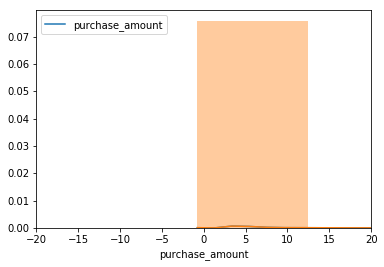

In [10]:
sns.kdeplot(new_hist_trans['purchase_amount'])
# sns.kdeplot(new_hist_trans['purchase_amount'], bw=.2, label="bw: 0.2")
# sns.kdeplot(new_hist_trans['purchase_amount'])
plt.legend();
plt.xlim(-20,20)
sns.distplot(new_hist_trans['purchase_amount'], bins=20, kde=True, rug=False);

In [11]:
def add_extra_cols(df):
    df['purchased_on_weekend'] = (df.purchase_Dayofweek >=5).astype(int)
    df['purchased_on_weekday'] = (df.purchase_Dayofweek <5).astype(int)
    df['month_diff'] = ((datetime.datetime.today() - df['purchase_date']).dt.days)//30
    df['month_diff'] += df['month_lag']
    df['authorized_flag'] = df['authorized_flag'].map({'Y':1, 'N':0})
    df['category_1'] = df['category_1'].map({'Y':1, 'N':0}) 
    df['category_3'] = df['category_3'].map({'A':0, 'B':1, 'C':2})
#     Trim the purchase_amount
#     df['purchase_amount'] = df['purchase_amount'].apply(lambda x: min(x, 0.8)) 
    return df

In [12]:
hist_trans, new_hist_trans = [add_extra_cols(df) for df in dfs]

In [13]:
hist_trans.shape, new_hist_trans.shape

((29112361, 33), (1963031, 33))

### Rolling aggregate on month

In [16]:
def aggregate_per_month(history):
    grouped = history.groupby(['card_id', 'month_diff'])['purchase_amount']

    agg_func = {
            'purchase_amount': ['count', 'sum', 'max', 'mean'],
            }

    intermediate_group = grouped.agg(agg_func)
    intermediate_group.columns = ['_'.join(col).strip() for col in intermediate_group.columns.values]
    intermediate_group.reset_index(inplace=True)

    final_group = intermediate_group.groupby('card_id').agg(['mean', 'sum', np.ptp, 'max'])
    final_group.columns = ['_'.join(col).strip() for col in final_group.columns.values]
    final_group.reset_index(inplace=True)
    
    return final_group

### Time between successive transactions

In [14]:
def time_diff(df):
    df['purchase_date_successive_diff'] = df.sort_values('purchase_date').groupby('card_id')['purchase_date'].diff().dt.total_seconds()
    df['purchase_date_successive_diff'].fillna(0, inplace=True)
    return df

In [15]:
hist_trans, new_hist_trans = [time_diff(df) for df in dfs]

In [16]:
hist_trans.to_feather('hist_trans_beta')
new_hist_trans.to_feather('new_hist_trans_beta')

In [17]:
hist_trans = feather.read_dataframe('hist_trans_beta')
new_hist_trans = feather.read_dataframe('new_hist_trans_beta')

In [18]:
dfs = [hist_trans, new_hist_trans]

In [9]:
new_hist_trans.head().T

,0,1,2,3,4
authorized_flag,1,1,1,1,1
card_id,C_ID_415bb3a509,C_ID_415bb3a509,C_ID_415bb3a509,C_ID_415bb3a509,C_ID_ef55cf8d4b
city_id,107,140,330,-1,-1
category_1,0,0,0,1,1
installments,1,1,1,1,1
category_3,1,1,1,1,1
merchant_category_id,307,307,507,661,166
merchant_id,M_ID_b0c793002c,M_ID_88920c89e8,M_ID_ad5237ef6b,M_ID_9e84cda3b1,M_ID_3c86fa3831
month_lag,1,1,2,1,1
purchase_amount,-0.557574,-0.56958,-0.551037,-0.671925,-0.659904


### Additional features

In [19]:
def additional_feats(hist_df):
    hist_df['price'] = hist_df['purchase_amount'] / hist_df['installments']
    #Christmas : December 25 2017
    hist_df['Christmas_Day_2017']=(pd.to_datetime('2017-12-25')-hist_df['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
    #Mothers Day: May 14 2017
    hist_df['Mothers_Day_2017']=(pd.to_datetime('2017-06-04')-hist_df['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
    #fathers day: August 13 2017
    hist_df['fathers_day_2017']=(pd.to_datetime('2017-08-13')-hist_df['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
    #Childrens day: October 12 2017
    hist_df['Children_day_2017']=(pd.to_datetime('2017-10-12')-hist_df['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
    #Valentine's Day : 12th June, 2017
    hist_df['Valentine_Day_2017']=(pd.to_datetime('2017-06-12')-hist_df['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
    #Black Friday : 24th November 2017
    hist_df['Black_Friday_2017']=(pd.to_datetime('2017-11-24') - hist_df['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
    #2018
    #Mothers Day: May 13 2018
    hist_df['Mothers_Day_2018']=(pd.to_datetime('2018-05-13')-hist_df['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
    hist_df['duration'] = hist_df['purchase_amount']*hist_df['month_diff']
    hist_df['amount_month_ratio'] = hist_df['purchase_amount']/hist_df['month_diff']
    return hist_df

In [20]:
hist_trans, new_hist_trans = [additional_feats(df) for df in dfs]

In [21]:
hist_trans.shape, new_hist_trans.shape

((29112361, 44), (1963031, 44))

### Aggregate by card_id

In [69]:
# hist_trans.head().T

In [23]:
def aggregate_by_card_id(df):
    unique_cols = ['city_id', 'merchant_category_id', 'merchant_id', 'state_id', 'subsector_id']

    col_seas = ['purchase_Month', 'purchase_Week', 'purchase_Day', 'purchase_Hour', 'purchase_Minute']

    aggs = {}
    for c in unique_cols:
        aggs[c] = ['nunique'] 
    for c in col_seas:
        aggs[c] = ['nunique', 'mean', 'min', 'max']
    
    aggs['purchase_amount'] = ['sum','max','min','mean','var','skew','first', 'last']
    aggs['installments'] = ['sum','max','mean']
    aggs['price'] = ['sum','mean','max']
    aggs['purchase_date'] = ['max','min']
    aggs['month_lag'] = ['max','min','mean','var','skew']
    aggs['month_diff'] = ['max','min','mean','var','skew']
    aggs['authorized_flag'] = ['sum', 'mean']
    aggs['purchased_on_weekend'] = ['mean']
    aggs['purchased_on_weekday'] = ['mean']
    aggs['category_1'] = ['sum', 'mean']
    aggs['category_2'] = ['mean']
    aggs['category_3'] = ['mean']
    aggs['card_id'] = ['size', 'count']
    aggs['Christmas_Day_2017'] = ['mean']
    aggs['Mothers_Day_2017'] = ['mean']
    aggs['fathers_day_2017'] = ['mean']
    aggs['Children_day_2017'] = ['mean']
    aggs['Valentine_Day_2017'] = ['mean']
    aggs['Black_Friday_2017'] = ['mean']
    aggs['Mothers_Day_2018'] = ['mean']
    aggs['duration']=['mean','min','max','var','skew']
    aggs['purchase_Elapsed'] = ['max', 'mean', 'skew']
    aggs['amount_month_ratio']=['mean','min','max','var','skew']
#     aggs['purchase_date_successive_diff'] = ['mean', 'median', 'max', 'min', 'var', 'skew']
    for col in ['category_2','category_3']:
        df[col+'_mean'] = df.groupby([col])['purchase_amount'].transform('mean')
        df[col+'_min'] = df.groupby([col])['purchase_amount'].transform('min')
        df[col+'_max'] = df.groupby([col])['purchase_amount'].transform('max')
        df[col+'_sum'] = df.groupby([col])['purchase_amount'].transform('sum')
        aggs[col+'_mean'] = ['mean']

    new_df = df.groupby(['card_id']).agg(aggs)
    new_df.columns = ['_'.join(col).strip() for col in new_df.columns.values]
    new_df.reset_index(inplace=True)
    other_df = (df.groupby('card_id')
          .size()
          .reset_index(name='transactions_count'))
    
    new_df = pd.merge(other_df, new_df, on='card_id', how='left')

    new_df['purchase_date_diff'] = (new_df['purchase_date_max'] - new_df['purchase_date_min']).dt.days
    new_df['purchase_date_average'] = new_df['purchase_date_diff']/new_df['card_id_size']
    new_df['purchase_date_uptonow'] = (datetime.datetime.today() - new_df['purchase_date_max']).dt.days
    new_df['purchase_date_uptomin'] = (datetime.datetime.today() - new_df['purchase_date_min']).dt.days
    return new_df

In [14]:
# dfs_e = [hist_trans_c_e, new_hist_trans_c_e]

In [24]:
import gc
gc.collect()

21

In [16]:
scipy.stats.hmean

<function scipy.stats.stats.hmean(a, axis=0, dtype=None)>

In [25]:
%time hist_trans_agg, new_hist_trans_agg = [aggregate_by_card_id(df) for df in dfs]

CPU times: user 9min 11s, sys: 1min 13s, total: 10min 25s
Wall time: 8min 36s


### Add exta interpreted columns on aggregates

In [26]:
def add_extra_cols_on_agg(df):
    df['inverse_avg_transactions_per_day'] = df['purchase_date_diff']/df['card_id_size']
    df['days_since_last_transaction'] = (datetime.datetime.today() - df['purchase_date_max']).dt.days
    df['repurchase_merchant_rate'] = df['transactions_count']/df['merchant_id_nunique']
#     df['merchant_category_repurchase'] = df['merchant_category_id_nunique']/df['merchant_id_nunique']
    df['avg_spend_per_merchant'] = df['purchase_amount_sum']/df['merchant_id_nunique']
#     df['avg_trans_per_merchant'] = df['transactions_count']/df['merchant_id_nunique']
    df['avg_spend_per_transaction'] = df['purchase_amount_sum']/df['transactions_count']
    return df

In [27]:
[hist_trans_agg, new_hist_trans_agg] = [add_extra_cols_on_agg(df) for df in [hist_trans_agg, 
                                                                             new_hist_trans_agg]]

In [28]:
hist_trans_agg.to_feather('hist_trans_agg_beta')
new_hist_trans_agg.to_feather('new_hist_trans_agg_beta')

In [29]:
hist_trans_agg = feather.read_dataframe('hist_trans_agg_beta')
new_hist_trans_agg = feather.read_dataframe('new_hist_trans_agg_beta')

### Aggregate on categories

In [25]:
def agg_on_cat(df, category, feature):
    temp_df = df.pivot_table(index='card_id', columns=category, aggfunc={feature: ['sum', 'mean']})
    cols = [category + '_{0[2]}_{0[0]}_{0[1]}'.format(col) for col in temp_df.columns.tolist()]
    temp_df.columns = cols
    return temp_df

In [26]:
def get_cat_agg(df):
    agg_df = agg_on_cat(df, 'category_1', 'purchase_amount')
    agg_df = pd.merge(agg_df, agg_on_cat(df, 'category_2', 'purchase_amount'), on='card_id', how='left')
    agg_df = pd.merge(agg_df, agg_on_cat(df, 'category_3', 'purchase_amount'), on='card_id', how='left')
    agg_df = pd.merge(agg_df, agg_on_cat(df, 'authorized_flag', 'purchase_amount'), on='card_id', how='left')
    return agg_df

In [27]:
# %time hist_trans_agg_cat, new_hist_trans_agg_cat = [get_cat_agg(df) for df in [hist_trans, new_hist_trans]]

In [28]:
# hist_trans_agg_cat.shape, new_hist_trans_agg_cat.shape

### Aggregate on month

In [54]:
def aggregate_per_month(history):
    grouped = history.groupby(['card_id', 'month_diff'])['purchase_amount']

    agg_func = {
            'purchase_amount': ['count', 'sum', 'max', 'mean'],
            }

    intermediate_group = grouped.agg(agg_func)
    intermediate_group.columns = ['_'.join(col).strip() for col in intermediate_group.columns.values]
    intermediate_group.reset_index(inplace=True)

    final_group = intermediate_group.groupby('card_id').agg(['mean', 'sum', np.ptp, 'max'])
    final_group.columns = ['_'.join(col).strip() for col in final_group.columns.values]
    final_group.reset_index(inplace=True)
    
    return final_group

In [55]:
%time hist_trans_agg_month, new_hist_trans_agg_month = [aggregate_per_month(df) for df in [hist_trans, new_hist_trans]]

/home/chandrasekhar/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


CPU times: user 3min 35s, sys: 10.9 s, total: 3min 45s
Wall time: 3min 29s


In [56]:
hist_trans_agg_month.shape, new_hist_trans_agg_month.shape

((325540, 21), (290001, 21))

### Load test & train DFs

In [30]:
PATH = 'data/elo/'

In [31]:
train, test = [pd.read_csv(f'{PATH}{c}') for c in ['train.csv', 'test.csv']]

### Add date part to test & train dfs

In [32]:
add_datepart(train, 'first_active_month', drop=False)
add_datepart(test, 'first_active_month', drop=False)

### Merge train & test with new & old transactions history

In [33]:
def join_dfs(left, right, left_on, right_on=None, suffix='_old'):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, suffixes=("", suffix))

In [34]:
train_df = join_dfs(train, new_hist_trans_agg, left_on='card_id')

In [35]:
train_df = join_dfs(train_df, hist_trans_agg, left_on='card_id', suffix='_old')
# train_df = join_dfs(train_df, hist_trans_agg_month, left_on='card_id', suffix='_old')

In [36]:
test_df = join_dfs(test, new_hist_trans_agg, left_on='card_id')
test_df = join_dfs(test_df, hist_trans_agg, left_on='card_id', suffix='_old')
# test_df = join_dfs(test_df, new_hist_trans_agg_month, left_on='card_id')

In [37]:
test_df.shape, train_df.shape

((123623, 204), (201917, 205))

### Add extra columns like age, total transactions, installments, purchase amount, first buy etc

In [38]:
for df in [train_df, test_df]:
    df['elapsed_time'] = (datetime.datetime.today() - df['first_active_month']).dt.days
    df['card_id_total'] = df['card_id_size']+df['card_id_size_old']
    df['card_id_count_total'] = df['card_id_count']+df['card_id_count_old']
    df['card_id_count_ratio'] = df['card_id_count_old']/df['card_id_count']
    df['purchase_amount_total'] = df['purchase_amount_sum_old']+df['purchase_amount_sum']
    df['purchase_amount_total_mean'] = df['purchase_amount_mean']+df['purchase_amount_mean_old']
    df['purchase_amount_total_max'] = df['purchase_amount_max']+df['purchase_amount_max_old']
    df['purchase_amount_total_min'] = df['purchase_amount_min']+df['purchase_amount_min_old']
    df['purchase_amount_sum_ratio'] = df['purchase_amount_sum_old']/df['purchase_amount_sum']
    df['hist_first_buy'] = (df['purchase_date_min_old'] - df['first_active_month']).dt.days
    df['new_first_buy'] = (df['purchase_date_min'] - df['first_active_month']).dt.days
    df['hist_last_buy'] = (df['purchase_date_max_old'] - df['first_active_month']).dt.days
    df['new_last_buy'] = (df['purchase_date_max'] - df['first_active_month']).dt.days
    df['purchase_amount_max_total'] = df['purchase_amount_max'] + df['purchase_amount_max_old']
    df['avg_spend_per_transaction'] = df['purchase_amount_total']/df['card_id_total']
    df['purchased_before_issue'] = df['hist_first_buy'] < 0
    df['month_diff_mean'] = df['month_diff_mean']+df['month_diff_mean_old']
    df['month_diff_ratio'] = df['month_diff_mean']/df['month_diff_mean_old']
    df['month_lag_mean'] = df['month_lag_mean']+df['month_lag_mean_old']
    df['month_lag_max'] = df['month_lag_max']+df['month_lag_max_old']
    df['month_lag_min'] = df['month_lag_min']+df['month_lag_min_old']
    df['category_1_mean'] = df['category_1_mean']+df['category_1_mean_old']
    df['installments_total'] = df['installments_sum']+df['installments_sum_old']
    df['installments_mean'] = df['installments_mean']+df['installments_mean_old']
    df['installments_max'] = df['installments_max']+df['installments_max_old']
    df['installments_ratio'] = df['installments_sum']/df['installments_sum_old']
    df['price_total'] = df['purchase_amount_total'] / df['installments_total']
    df['price_mean'] = df['purchase_amount_mean'] / df['installments_mean']
    df['price_max'] = df['purchase_amount_max'] / df['installments_max']
    df['duration_mean'] = df['duration_mean']+df['duration_mean_old']
    df['duration_min'] = df['duration_min']+df['duration_min_old']
    df['duration_max'] = df['duration_max']+df['duration_max_old']
    df['amount_month_ratio_mean']=df['amount_month_ratio_mean']+df['amount_month_ratio_mean_old']
    df['amount_month_ratio_min']=df['amount_month_ratio_min']+df['amount_month_ratio_min_old']
    df['amount_month_ratio_max']=df['amount_month_ratio_max']+df['amount_month_ratio_max_old']
    df['CLV'] = df['card_id_count'] * df['purchase_amount_sum'] / df['month_diff_mean']
    df['CLV_old'] = df['card_id_count_old'] * df['purchase_amount_sum_old'] / df['month_diff_mean_old']
    df['CLV_ratio'] = df['CLV'] / df['CLV_old']

In [39]:
(test_df['purchased_before_issue']).sum()

3309

### Mark the outliers

In [40]:
train_df['outliers'] = 0
train_df.loc[train_df['target'] < -30, 'outliers'] = 1
train_df['outliers'].value_counts()

0    199710
1      2207
Name: outliers, dtype: int64

### Adding train days

In [41]:
def add_days_feature_interaction(df):
    # to datetime
    df['first_active_month'] = pd.to_datetime(df['first_active_month'])

    # datetime features
    df['quarter'] = df['first_active_month'].dt.quarter
    df['elapsed_time'] = (datetime.datetime.today() - df['first_active_month']).dt.days

    df['days_feature1'] = df['elapsed_time'] * df['feature_1']
    df['days_feature2'] = df['elapsed_time'] * df['feature_2']
    df['days_feature3'] = df['elapsed_time'] * df['feature_3']

    df['days_feature1_ratio'] = df['feature_1'] / df['elapsed_time']
    df['days_feature2_ratio'] = df['feature_2'] / df['elapsed_time']
    df['days_feature3_ratio'] = df['feature_3'] / df['elapsed_time']
    df['feature_sum'] = df['feature_1'] + df['feature_2'] + df['feature_3']
    df['feature_prod'] = df['feature_1'] * df['feature_2'] * df['feature_3']
    df['feature_mean'] = df['feature_sum']/3
    df['feature_max'] = df[['feature_1', 'feature_2', 'feature_3']].max(axis=1)
    df['feature_min'] = df[['feature_1', 'feature_2', 'feature_3']].min(axis=1)
    df['feature_var'] = df[['feature_1', 'feature_2', 'feature_3']].std(axis=1)
    return df

In [42]:
train_df, test_df = [add_days_feature_interaction(d) for d in [train_df, test_df]]

### Target encode the outliers 

In [43]:
train_df.shape, test_df.shape

((201917, 241), (123623, 239))

In [44]:
for f in ['feature_1','feature_2','feature_3']:
    order_label = train_df.groupby([f])['outliers'].mean()
    train_df[f] = train_df[f].map(order_label)
    test_df[f] = test_df[f].map(order_label)

In [45]:
train_df.to_feather('train_df_beta')
test_df.to_feather('test_df_beta')